# Tensors in PyTorch

In [5]:
import numpy as np
import torch
from PIL import Image

## Tensors with all elements being zero

In [6]:
# A 1-d all-zero tensor (vector) with 10 elements
a = torch.zeros(10)
print(f"{type(a)=}")
print(f"{a=}")
print(f"{a.shape=}")
print(f"{a.ndim=}")

type(a)=<class 'torch.Tensor'>
a=tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
a.shape=torch.Size([10])
a.ndim=1


In [7]:
# A 2-d all-one tensor (matrix) with shape 3,4
b = torch.ones((3, 4))
print(f"{type(b)=}")
print(f"{b=}")
print(f"{b.shape=}")
print(f"{b.ndim=}")

type(b)=<class 'torch.Tensor'>
b=tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
b.shape=torch.Size([3, 4])
b.ndim=2


## Representing a color image with 3-D tensor

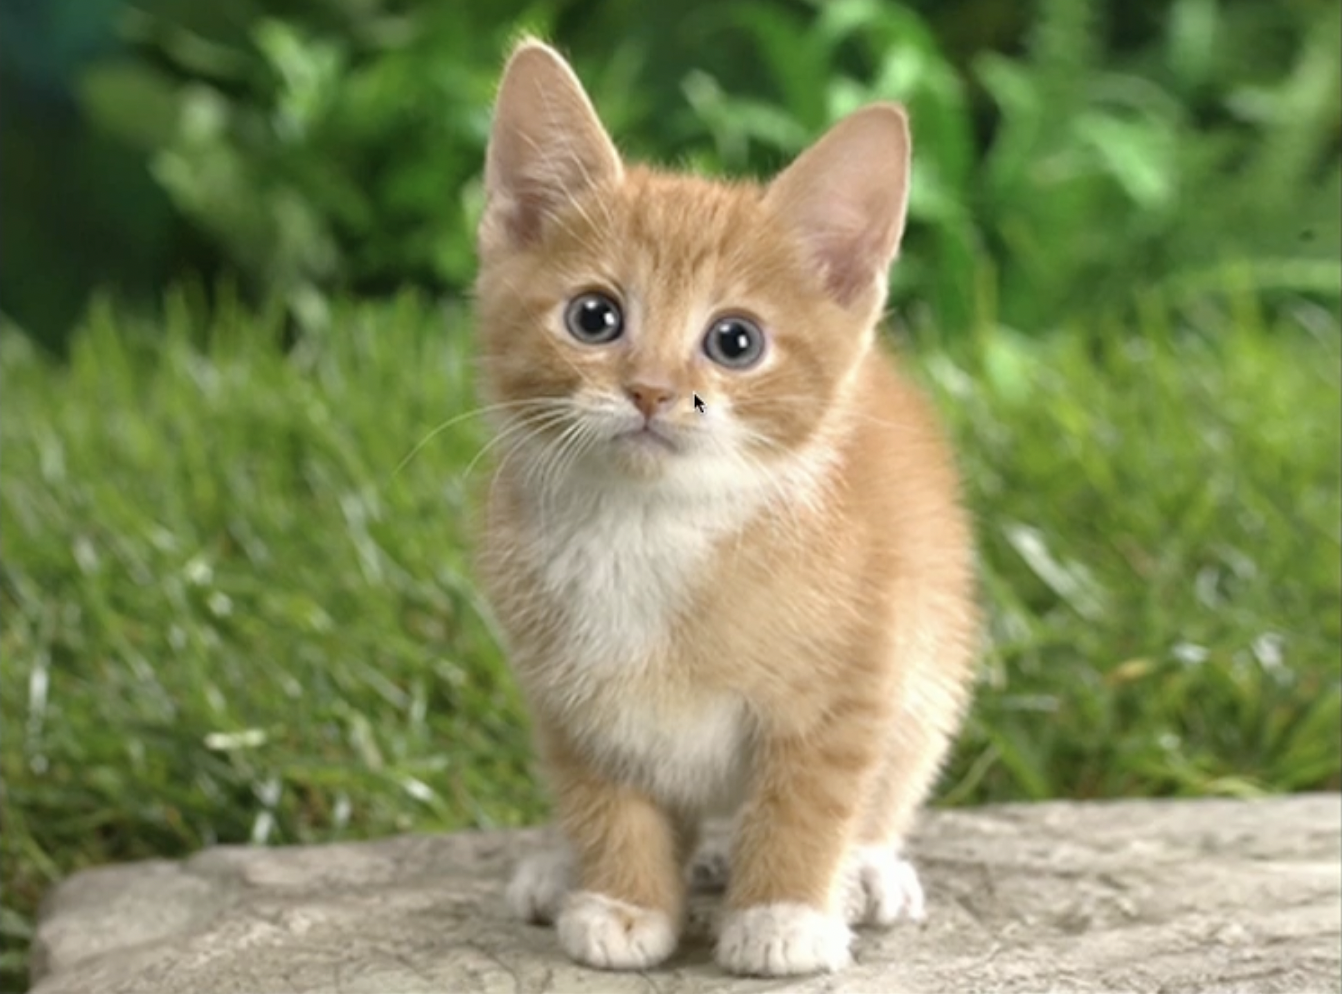

In [8]:
# We first use PIL.Image to read an image and visualize it
img_pil = Image.open("cat.jpg")
img_pil

In [9]:
# We can convert this PIL image to a tensor with shape (H, W, C),
# where each element (pixel) is an uint8 (0-255).
# Unfortunately PyTorch cannot load PIL images directly,
# hence we need to convert them to a numpy array first.
img_array = torch.as_tensor(np.array(img_pil))
print(f"{img_array=}")
print(f"{img_array.shape=}")
print(f"{img_array.dtype=}")

img_array=tensor([[[ 36,  58,  51, 255],
         [ 34,  58,  49, 255],
         [ 31,  58,  48, 255],
         ...,
         [ 79, 103,  53, 255],
         [ 77,  99,  53, 255],
         [ 73,  93,  51, 255]],

        [[ 36,  58,  50, 255],
         [ 34,  58,  49, 255],
         [ 30,  58,  48, 255],
         ...,
         [ 80, 103,  52, 255],
         [ 78, 101,  53, 255],
         [ 74,  92,  51, 255]],

        [[ 36,  58,  51, 255],
         [ 34,  59,  50, 255],
         [ 33,  59,  50, 255],
         ...,
         [ 80, 105,  51, 255],
         [ 78, 101,  53, 255],
         [ 74,  94,  50, 255]],

        ...,

        [[ 46,  52,  31, 255],
         [ 46,  51,  29, 255],
         [ 45,  51,  27, 255],
         ...,
         [187, 186, 167, 255],
         [179, 180, 163, 255],
         [164, 165, 151, 255]],

        [[ 50,  55,  38, 255],
         [ 50,  56,  35, 255],
         [ 50,  56,  34, 255],
         ...,
         [187, 186, 167, 255],
         [180, 180, 164, 255],

## Manipulating tensors

In PyTorch, element-wise operation is written as follows:

In [10]:
# elementwise operation
a = torch.tensor([0, 1, 2])
b = torch.tensor([4, 5, 6])
print(f"{a=}")
print(f"{b=}")
print(f"elementwise addition: {a + b=}")  # equivalent to `torch.add(a, b)`
print(f"elementwise substraction: {a - b=}")  # equivalent to `torch.sub(a, b)`
print(f"elementwise multiplication: {a * b=}")  # equivalent to `torch.mul(a, b)`
print(f"elementwise division: {a / b=}")  # equivalent to `torch.div(a, b)`

a=tensor([0, 1, 2])
b=tensor([4, 5, 6])
elementwise addition: a + b=tensor([4, 6, 8])
elementwise substraction: a - b=tensor([-4, -4, -4])
elementwise multiplication: a * b=tensor([ 0,  5, 12])
elementwise division: a / b=tensor([0.0000, 0.2000, 0.3333])


For all element-wise operations, make sure both tensors have the same shape.
Otherwise the operation will fail and raise an error.

In [11]:
# We generate two tensor with shape of 5 and 6 filled with random numbers
# from a uniform distribution on the interval $[0, 1)$.
# In this case, the element-wise addition operation will fail and raise an error.
a = torch.rand(5)
b = torch.rand(6)
try:
    print(f"{a + b=}")
except RuntimeError as e:
    print(e)

The size of tensor a (5) must match the size of tensor b (6) at non-singleton dimension 0


The cool thing about tensor is we can run a large number of operations together.

In [12]:
x = torch.rand(1_000_000)
y = torch.rand(1_000_000)
print(f"{x + y=}")

x + y=tensor([1.1886, 0.4028, 0.8044,  ..., 1.4456, 1.3399, 1.0155])


## Transpose

## View vs Reshape

Both operations manipuate the tensor and return a tensor with the same data with a specific shape.



In [14]:
a = torch.rand(6)
print(f"{a=}")
print(f"{a.view(2, 3)=}")
print(f"{a.reshape(2, 3)=}")

a=tensor([0.9190, 0.4751, 0.0574, 0.8929, 0.6632, 0.3241])
a.view(2, 3)=tensor([[0.9190, 0.4751, 0.0574],
        [0.8929, 0.6632, 0.3241]])
a.reshape(2, 3)=tensor([[0.9190, 0.4751, 0.0574],
        [0.8929, 0.6632, 0.3241]])


These two operations can yield similar outcomes but can work differently.\
`torch.view` merely creates a view of the original tensor and shares the underling data
with the original tensor.
To ensure the data sharing, `torch.view` can only operate on *contiguous* tensors,
meaning that the tensors to be viewed must are stored in contiguous memory.\
In contrast, `torch.reshape` does not have this constraint.
Whenever possible, the returned tensor will be a view of input.
Otherwise, it will be a copy.


A simple non-contigous case may arise because of transpose operation.



In [36]:
a = torch.rand(2, 3)
b = a.mT
print(f"{a=}")
try:
    print(f"{b.view(6)=}")
except RuntimeError as e:
    print(e)
print(f"{b.contiguous().view(6)=}")
print(f"{b.reshape(6)=}")

a=tensor([[0.6184, 0.6646, 0.4091],
        [0.8349, 0.2262, 0.6598]])
view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
b.contiguous().view(6)=tensor([0.6184, 0.8349, 0.6646, 0.2262, 0.4091, 0.6598])
b.reshape(6)=tensor([0.6184, 0.8349, 0.6646, 0.2262, 0.4091, 0.6598])


## Permute

`torch.permute` returns a view of the original tensor input with its dimensions permuted to have a desired ordering.
It can be thought of a generalized tranpose operation in N-D tensor.

Please beware that `torch.permute` is *NOT* the same as `torch.view`
even though they return tensors with same shapes sometimes.


In [38]:
a = torch.rand(2, 3)
print(f"{a=}")
print(f"{a.view(3, 2)=}")
print(f"{a.permute(1, 0)=}")

a=tensor([[0.0335, 0.8269, 0.3387],
        [0.1262, 0.0962, 0.9028]])
a.view(3, 2)=tensor([[0.0335, 0.8269],
        [0.3387, 0.1262],
        [0.0962, 0.9028]])
a.permute(1, 0)=tensor([[0.0335, 0.1262],
        [0.8269, 0.0962],
        [0.3387, 0.9028]])


## Squeeze

`torch.squeeze` returns a tensor with all specified dimensions of input of size 1 removed.
Please note that you should NEVER call `torch.squeeze` without an argument specifying the dimensions to be removed.


In [17]:
a = torch.rand(3, 1, 1, 2)
print(f"{a.squeeze(1).shape=}")
print(f"{a.squeeze((1, 2)).shape=}")
print(f"{a.squeeze().shape=}")  # Illustration purpose only! You should NEVER use this.

a.squeeze(1).shape=torch.Size([3, 1, 2])
a.squeeze((1, 2)).shape=torch.Size([3, 2])
a.squeeze().shape=torch.Size([3, 2])


## Indexing

The contents of a tensor can be accessed and modified using Python’s indexing and slicing notation:


In [18]:
a = torch.rand(2, 3)
print(f"{a=}")
print(f"{a[1, 0]=}")
print(f"{a[1, :]=}")
print(f"{a[:, 2]=}")
print(a[:, [0, 2]])  # equivalent to torch.index_select(a, 1, torch.tensor([0, 2])))

a=tensor([[0.1018, 0.7945, 0.9997],
        [0.3145, 0.6514, 0.2328]])
a[1, 0]=tensor(0.3145)
a[1, :]=tensor([0.3145, 0.6514, 0.2328])
a[:, 2]=tensor([0.9997, 0.2328])
tensor([[0.1018, 0.9997],
        [0.3145, 0.2328]])


## Broadcasting

## Broadcasting - Outer-product-like addition

Let's start from an example of outer product.
It can be implemented with a for-loop or an in-built function `torch.outer`.


In [19]:
a = torch.arange(6)
b = torch.arange(5)
c = torch.zeros((6, 5), dtype=a.dtype)
for i in range(6):
    for j in range(5):
        c[i, j] = a[i] * b[j]
print(f"{c=}")
print(f"{torch.outer(a, b)=}")

c=tensor([[ 0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4],
        [ 0,  2,  4,  6,  8],
        [ 0,  3,  6,  9, 12],
        [ 0,  4,  8, 12, 16],
        [ 0,  5, 10, 15, 20]])
torch.outer(a, b)=tensor([[ 0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4],
        [ 0,  2,  4,  6,  8],
        [ 0,  3,  6,  9, 12],
        [ 0,  4,  8, 12, 16],
        [ 0,  5, 10, 15, 20]])


As you can see above, the outer product multiplies each pair of numbers from the two input tensors.

Let's say we want to add (instead of multiply) each pair of elements,
there is no such operation in PyTorch that can do this directly.
A slightly painful way to implement this is to use a for loop.


In [20]:
a = torch.arange(6)
b = torch.arange(5)
c = torch.zeros((6, 5), dtype=a.dtype)

for i in range(6):
    for j in range(5):
        c[i, j] = a[i] + b[j]

c

tensor([[0, 1, 2, 3, 4],
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 6],
        [3, 4, 5, 6, 7],
        [4, 5, 6, 7, 8],
        [5, 6, 7, 8, 9]])

This, however, is not very efficient and is a lot of code.

PyTorch allows you to do this more efficiently using *broadcasting*.


In [21]:
a = torch.arange(6)
b = torch.arange(5)
print(a[:, None] + b[None, :])

tensor([[0, 1, 2, 3, 4],
        [1, 2, 3, 4, 5],
        [2, 3, 4, 5, 6],
        [3, 4, 5, 6, 7],
        [4, 5, 6, 7, 8],
        [5, 6, 7, 8, 9]])


Let's unpack our example of outer-product-like addition.
First, we can add a new dimension of shape 1 to a tensor by passing a `None` index like below.


In [22]:
a = torch.arange(10)
print(f"{a.shape=}")
print(f"{a[None].shape=}")
print(f"{a[:, None].shape=}")
print(f"{a[:, None, None].shape=}")
print(f"{a[None, :, None].shape=}")

a.shape=torch.Size([10])
a[None].shape=torch.Size([1, 10])
a[:, None].shape=torch.Size([10, 1])
a[:, None, None].shape=torch.Size([10, 1, 1])
a[None, :, None].shape=torch.Size([1, 10, 1])


After that, a tensor whose shape dimension is 1 can be expanded (or *broadcast*ed).
In this example of `a[:, None] + b[None, :]`, `a[:, None]` and `b[None, :]` has shape (6,1)
and shape (1, 5) respectively, so `a` and `b` are *broadcastable* and the resulting tensor will be expanded to (6, 5).


## Finding maximum distance between points


Let's look at another example.
Assume that we randomly generate a set of 100 2-D points from a 2-D space following
standard normal distribution (`x=torch.randn(100, 2)`).
We want to find the maximum distance between points.

A naive way is to compute the pairwise distance using a nested loop and compute the maximum thereon.
With broadcasting, we can do it in one line.


In [23]:
x = torch.randn(100, 2)
d = torch.zeros(100, 100)

# For-loop
for i in range(100):
    for j in range(i, 100):
        d[i, j] = ((x[i] - x[j]) ** 2).sum().sqrt()
print(f"{torch.max(d)=}")

# One-line with broadcasting
((x[:, None, :] - x[None, :, :]) ** 2).sum(2).sqrt().max()

torch.max(d)=tensor(5.8177)


tensor(5.8177)

## Matrix multiplcation in batches


Let's see another example.
Assume we want have a 3-d tensor `a` and a 2-d matrix `b`.
For each slice of `a` (`a[i, ...]`), we want to multiply it with matrix ` b`.
A naive way is to do the for loop but it's super slow when the number of slices becomes large.
With broadcasting, the operation is written in one line and executes faster.


In [24]:
a = torch.randn(100, 50, 200)
b = torch.randn(200, 100)

c = torch.empty(100, 50, 100)

%timeit for i in range(100): c[i, ...] = a[i, ...] @ b
%timeit a @ b

710 μs ± 33.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
324 μs ± 42.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The gain is more significant if we move the tensor to the GPU.



In [25]:
if torch.cuda.is_available():
    # note this will fail if you don't have a GPU
    a = a.cuda()
    b = b.cuda()
    c = c.cuda()
    %timeit for i in range(100): c[i, ...] = a[i, ...] @ b
    %timeit a @ b

-

## Matrix multiplication

In [26]:
a = torch.rand(2, 4)
b = torch.rand(4, 3)
print(f"{a @ b=}")  # equivalent to `torch.matmul(a, b)`

a @ b=tensor([[0.7394, 0.7456, 1.3297],
        [0.9513, 1.3045, 1.3038]])


Beware of the dimensions of matrices. The number of columns of tensor a must be equal to
the number of rows of tensor b. The example below does not work.



In [27]:
a = torch.rand(5, 5)
b = torch.rand(3, 5)
try:
    print(f"{a @ b=}")
except RuntimeError as e:
    print(e)

mat1 and mat2 shapes cannot be multiplied (5x5 and 3x5)


## Vector multiplication

Let's first look at vector and matrix multiplication.

In [28]:
M = torch.rand(3, 3)
v = torch.rand(3, 1)

print(f"matrix: {M=}")
print(f"column vector: {v=}")

print(f"column vector can be multiplied on the right {M @ v=}")

matrix: M=tensor([[0.1602, 0.7738, 0.9678],
        [0.0735, 0.0864, 0.5268],
        [0.6249, 0.6243, 0.6256]])
column vector: v=tensor([[0.9156],
        [0.2516],
        [0.4781]])
column vector can be multiplied on the right M @ v=tensor([[0.8041],
        [0.3409],
        [1.0283]])


In [29]:
w = torch.rand(1, 3)

print(f"row vector: {w=}")

print(f"row vector can be multiplied on the left {w @ M=}")

row vector: w=tensor([[0.5871, 0.5465, 0.2170]])
row vector can be multiplied on the left w @ M=tensor([[0.2699, 0.6370, 0.9919]])


Let's see vector-vector multiplication next:

In [30]:
print("Define two column vectors")

a = torch.rand(3, 1)
b = torch.rand(3, 1)

print(f"{a=}")
print(f"{b=}")

Define two column vectors
a=tensor([[0.1230],
        [0.3766],
        [0.7947]])
b=tensor([[0.6962],
        [0.3255],
        [0.2183]])


In [31]:
# Inner product
print("Inner product")
print(f"{a.T @ b=}")  # equivalent to `torch.dot(a.T, b)`

Inner product
a.T @ b=tensor([[0.3817]])


In [32]:
# Outer product
print("Outer product")
print(f"{a @ b.T=}")  # equivalent to `torch.dot(a, b.T)`

Outer product
a @ b.T=tensor([[0.0856, 0.0400, 0.0268],
        [0.2622, 0.1226, 0.0822],
        [0.5533, 0.2587, 0.1735]])


## Euclidean norm

In [33]:
v = torch.rand(3, 1)


print(f"{v=}")

print("we can compute the norm of a vector with definition")
print(f"{(v ** 2).sum().sqrt()=}")

print("or with torch.norm")

print(f"{torch.norm(v)=}")
print("warning: using torch.norm is slower")

v=tensor([[0.2659],
        [0.0440],
        [0.3895]])
we can compute the norm of a vector with definition
(v ** 2).sum().sqrt()=tensor(0.4736)
or with torch.norm
torch.norm(v)=tensor(0.4736)


## Frobenius norm

In [34]:
W = torch.rand(3, 3)

print(f"{W=}")

print("we can compute the norm of a matrix with definition")

print(f"{torch.sqrt(torch.sum(W ** 2))=}")

print("or with torch.norm")

print(f"{torch.norm(W)=}")
print("warning: using torch.norm is slower")

W=tensor([[0.9020, 0.4460, 0.3693],
        [0.2017, 0.5505, 0.2233],
        [0.2627, 0.7035, 0.8848]])
we can compute the norm of a matrix with definition
torch.sqrt(torch.sum(W ** 2))=tensor(1.6998)
or with torch.norm
torch.norm(W)=tensor(1.6998)
